In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import scipy
from scipy import stats
import scipy.stats as sci

## LOAD DATASET

In [2]:
customer_data = pd.read_csv('user_demographics.csv')
customer_data['date'] = customer_data['reg_date']

In [3]:
customer_data.head()

,uid,reg_date,device,gender,country,age,date
0,54030035.0,2017-06-29T00:00:00Z,and,M,USA,19,2017-06-29T00:00:00Z
1,72574201.0,2018-03-05T00:00:00Z,iOS,F,TUR,22,2018-03-05T00:00:00Z
2,64187558.0,2016-02-07T00:00:00Z,iOS,M,USA,16,2016-02-07T00:00:00Z
3,92513925.0,2017-05-25T00:00:00Z,and,M,BRA,41,2017-05-25T00:00:00Z
4,99231338.0,2017-03-26T00:00:00Z,iOS,M,FRA,59,2017-03-26T00:00:00Z


In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   uid       10000 non-null  float64
 1   reg_date  10000 non-null  object 
 2   device    10000 non-null  object 
 3   gender    10000 non-null  object 
 4   country   10000 non-null  object 
 5   age       10000 non-null  int64  
 6   date      10000 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 547.0+ KB


In [5]:
len(customer_data)

10000

In [6]:
app_purchases = pd.read_csv('purchase_data_v1.csv')
app_purchases.head()

,date,uid,sku,price
0,2017-07-10,41195147,sku_three_499,499
1,2017-07-15,41195147,sku_three_499,499
2,2017-11-12,41195147,sku_four_599,599
3,2017-09-26,91591874,sku_two_299,299
4,2017-12-01,91591874,sku_four_599,599


In [7]:
app_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9006 entries, 0 to 9005
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    9006 non-null   object
 1   uid     9006 non-null   int64 
 2   sku     9006 non-null   object
 3   price   9006 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 281.6+ KB


In [8]:
len(app_purchases)

9006

In [9]:
# Merge on the 'uid' field
uid_combined_data = app_purchases.merge(customer_data, on=['uid'], how='inner')
uid_combined_data

,date_x,uid,sku,price,reg_date,device,gender,country,age,date_y
0,2017-07-10,41195147,sku_three_499,499,2017-06-26T00:00:00Z,and,M,BRA,17,2017-06-26T00:00:00Z
1,2017-07-15,41195147,sku_three_499,499,2017-06-26T00:00:00Z,and,M,BRA,17,2017-06-26T00:00:00Z
2,2017-11-12,41195147,sku_four_599,599,2017-06-26T00:00:00Z,and,M,BRA,17,2017-06-26T00:00:00Z
3,2017-09-26,91591874,sku_two_299,299,2017-01-05T00:00:00Z,and,M,TUR,17,2017-01-05T00:00:00Z
4,2017-12-01,91591874,sku_four_599,599,2017-01-05T00:00:00Z,and,M,TUR,17,2017-01-05T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...
9001,2017-09-16,63245432,sku_five_899,899,2016-12-04T00:00:00Z,and,F,FRA,20,2016-12-04T00:00:00Z
9002,2017-04-21,36350096,sku_seven_1499,499,2017-04-07T00:00:00Z,and,M,USA,23,2017-04-07T00:00:00Z
9003,2017-06-04,36350096,sku_three_499,499,2017-04-07T00:00:00Z,and,M,USA,23,2017-04-07T00:00:00Z
9004,2017-07-12,36350096,sku_one_199,199,2017-04-07T00:00:00Z,and,M,USA,23,2017-04-07T00:00:00Z


In [10]:
len(uid_combined_data)

9006

In [11]:
# Merge on the 'uid' and 'date' field
uid_date_combined_data = app_purchases.merge(customer_data, on=['uid', 'date'], how='inner')
len(uid_date_combined_data)

0

Note our second result returned fewer rows compared to the first one - 35 compared to 9006! This is because there were fewer matches

## Exploratory Data Analysis of KPIs

In [12]:
purchase_data = app_purchases.merge(customer_data, how='inner', on=['uid'])
purchase_data['date'] = purchase_data['date_x']

In [13]:
# Calculate the mean purchase price 
purchase_price_mean = purchase_data.price.agg('mean')
purchase_price_mean

406.77259604707973

In [14]:
# Calculate the mean and median purchase price 
purchase_price_summary = purchase_data.price.agg(['mean', 'median'])
purchase_price_summary

mean      406.772596
median    299.000000
Name: price, dtype: float64

In [15]:
# Calculate the mean and median of price and age
purchase_summary = purchase_data.agg({'price': ['mean','median'], 'age': ['mean','median']})
purchase_summary

,price,age
mean,406.772596,23.922274
median,299.000000,21.000000


Notice how the mean is higher than the median? This suggests that we have some users who are making a lot of purchases!

In [16]:
# Group the data
grouped_purchase_data = purchase_data.groupby(by=['device', 'gender'])

In [17]:
purchase_summary = grouped_purchase_data.agg({'price': ['mean', 'median', 'std']})
purchase_summary

price                   
                     mean median         std
device gender                               
and    F       400.747504    299  179.984378
       M       416.237308    499  195.001520
iOS    F       404.435330    299  181.524952
       M       405.272401    299  196.843197

In [18]:
current_date = pd.Timestamp('2018-03-17 00:00:00')

In [19]:
max_purchase_date = current_date - timedelta(days=28)

In [20]:
purchase_data['reg_date'] = pd.to_datetime(purchase_data['reg_date']).dt.strftime('%Y-%m-%d %H:%M:%S')
purchase_data['reg_date'] = purchase_data['reg_date'].apply(pd.Timestamp)

# Filter to only include users who registered before our max date
purchase_data_filt = purchase_data[purchase_data.reg_date < max_purchase_date]

In [21]:
# Filter to contain only purchases within the first 28 days of registration
purchase_data_filt = purchase_data_filt[(purchase_data_filt.date <= 
                                         purchase_data_filt.reg_date + 
                                         timedelta(days=28))]
purchase_data_filt

,date_x,uid,sku,price,reg_date,device,gender,country,age,date_y,date
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,2017-06-26T00:00:00Z,2017-07-10
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,2017-06-26T00:00:00Z,2017-07-15
19,2016-05-12,22870987,sku_four_599,599,2016-04-20,iOS,F,BRA,26,2016-04-20T00:00:00Z,2016-05-12
34,2017-01-12,88736154,sku_five_899,899,2017-01-08,and,F,BRA,19,2017-01-08T00:00:00Z,2017-01-12
92,2016-12-08,45588501,sku_four_599,599,2016-11-27,and,F,USA,49,2016-11-27T00:00:00Z,2016-12-08
...,...,...,...,...,...,...,...,...,...,...,...
8963,2017-12-19,72267850,sku_three_499,499,2017-11-28,iOS,F,TUR,22,2017-11-28T00:00:00Z,2017-12-19
8973,2017-12-20,80500054,sku_four_599,599,2017-12-05,and,M,USA,19,2017-12-05T00:00:00Z,2017-12-20
8976,2017-05-16,64796589,sku_two_299,299,2017-04-29,and,F,FRA,17,2017-04-29T00:00:00Z,2017-05-16
8998,2016-12-29,63245432,sku_four_599,599,2016-12-04,and,F,FRA,20,2016-12-04T00:00:00Z,2016-12-29


In [22]:
# Output the mean price paid per purchase
purchase_data_filt.price.mean()

414.4237288135593

The average price is 414 cents which is below $4.99 it seems that our purchasers tend towards the lower-priced set of options.

### Average purchase price by cohort

In [23]:
# Set the max registration date to be one month before today
max_reg_date = current_date - timedelta(days=28)

# Find the month 1 value
month1 = np.where((purchase_data.reg_date < max_reg_date) &
                 (purchase_data.date < purchase_data.reg_date + timedelta(days=28)),
                  purchase_data.price,
                  np.NaN)

# Update the value in the DataFrame
purchase_data['month1'] = month1

In [24]:
# Group the data by gender and device
purchase_data_upd = purchase_data.groupby(['gender', 'device'], as_index=False)

# Aggregate the month1 and price data
purchase_summary = purchase_data_upd.agg(
                        {'month1': ['mean', 'median'],
                        'price': ['mean', 'median']})
purchase_summary

gender device      month1              price       
                       mean median        mean median
0      F    and  388.204545  299.0  400.747504    299
1      F    iOS  432.587786  499.0  404.435330    299
2      M    and  413.705882  399.0  416.237308    499
3      M    iOS  433.313725  499.0  405.272401    299

This value seems relatively stable over the past 28 days.

## Visualizing Customer Behavior

In [25]:
user_purchases = pd.read_csv('first_week_purchase.csv')
user_purchases['date'] = pd.to_datetime(user_purchases['date'])

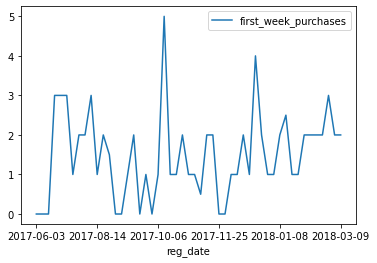

In [26]:
# Group the data and aggregate first_week_purchases
user_purchases = user_purchases.groupby(by=['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})

# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Plot the results 
user_purchases.plot(x='reg_date', y='first_week_purchases')
plt.show()

 There does indeed seem to be a substantial increase in the average number of first week purchases.

In [27]:
user_purchases = pd.read_csv('first_week_purchase.csv')
user_purchases['date'] = pd.to_datetime(user_purchases['date'])

# Group the data and aggregate first_week_purchases
user_purchases_country = user_purchases.groupby(by=['reg_date', 'country']).agg({'first_week_purchases': ['mean']})
user_purchases_device = user_purchases.groupby(by=['reg_date', 'device']).agg({'first_week_purchases': ['mean']})

In [28]:
# Pivot the data
country_pivot = pd.pivot_table(user_purchases_country, values=['first_week_purchases'], 
                               columns=['country'], index=['reg_date'])
country_pivot

first_week_purchases                                          \
                           mean                                           
country                     BRA       CAN       DEU       FRA       TUR   
reg_date                                                                  
2017-06-03                  NaN       NaN       NaN  0.000000       NaN   
2017-06-06                  NaN       NaN       NaN       NaN       NaN   
2017-06-26                  NaN       NaN       NaN       NaN       NaN   
2017-06-30                  NaN       NaN       NaN       NaN       NaN   
2017-07-04                  NaN       NaN       NaN  0.130435       NaN   
2017-07-16             0.200000       NaN       NaN       NaN       NaN   
2017-07-21                  NaN       NaN  0.027778       NaN       NaN   
2017-07-26                  NaN       NaN  0.050000       NaN       NaN   
2017-08-02                  NaN       NaN       NaN       NaN       NaN   
2017-08-05             0.142857       NaN       NaN       NaN       NaN   
2017-08-14                  NaN       NaN       NaN       NaN       NaN   
2017-08-18                  NaN       NaN  0.076923       NaN       NaN   
2017-08-20                  NaN       NaN       NaN  0.085714       NaN   
2017-08-29                  NaN       NaN       NaN       NaN       NaN   
2017-09-04                  NaN       NaN       NaN       NaN       NaN   
2017-09-07                  NaN       NaN       NaN       NaN       NaN   
2017-09-14                  NaN       NaN       NaN       NaN       NaN   
2017-09-18                  NaN       NaN       NaN       NaN       NaN   
2017-09-23                  NaN       NaN       NaN       NaN       NaN   
2017-10-03                  NaN       NaN       NaN  0.000000       NaN   
2017-10-06                  NaN       NaN       NaN  0.066667       NaN   
2017-10-18             0.178571       NaN       NaN       NaN       NaN   
2017-10-27                  NaN       NaN       NaN       NaN  0.050000   
2017-11-06             0.142857       NaN       NaN       NaN       NaN   
2017-11-10             0.125000       NaN       NaN       NaN       NaN   
2017-11-16                  NaN       NaN       NaN       NaN       NaN   
2017-11-19             0.125000       NaN       NaN       NaN       NaN   
2017-11-22                  NaN       NaN  0.000000       NaN       NaN   
2017-11-23                  NaN       NaN       NaN  0.095238       NaN   
2017-11-24             0.100000       NaN       NaN       NaN  0.230769   
2017-11-25             0.000000       NaN       NaN       NaN       NaN   
2017-12-11                  NaN       NaN       NaN       NaN       NaN   
2017-12-16                  NaN       NaN       NaN       NaN       NaN   
2017-12-21                  NaN  0.111111       NaN       NaN       NaN   
2017-12-24                  NaN       NaN  0.117647       NaN       NaN   
2017-12-26                  NaN       NaN  0.250000       NaN  0.083333   
2017-12-28                  NaN       NaN  0.222222       NaN       NaN   
2017-12-30                  NaN       NaN  0.250000       NaN       NaN   
2017-12-31                  NaN       NaN       NaN       NaN  0.125000   
2018-01-07             0.066667       NaN       NaN       NaN       NaN   
2018-01-08                  NaN       NaN       NaN       NaN       NaN   
2018-01-21                  NaN       NaN       NaN       NaN  0.333333   
2018-01-26                  NaN       NaN       NaN       NaN       NaN   
2018-01-31                  NaN       NaN       NaN       NaN       NaN   
2018-02-06                  NaN       NaN       NaN       NaN       NaN   
2018-02-09                  NaN       NaN       NaN       NaN       NaN   
2018-02-21                  NaN       NaN  0.666667       NaN       NaN   
2018-02-26             0.500000       NaN       NaN       NaN       NaN   
2018-02-27                  NaN       NaN       NaN       NaN       NaN   
2018-03-08                  NaN     

In [29]:
device_pivot = pd.pivot_table(user_purchases_device, values=['first_week_purchases'], columns=['device'], index=['reg_date'])
device_pivot

first_week_purchases          
                           mean          
device                      and       iOS
reg_date                                 
2017-06-03                  NaN  0.000000
2017-06-06                  NaN  0.000000
2017-06-26                  NaN  0.000000
2017-06-30                  NaN  0.081081
2017-07-04                  NaN  0.130435
2017-07-16                  NaN  0.200000
2017-07-21                  NaN  0.027778
2017-07-26                  NaN  0.050000
2017-08-02             0.041667       NaN
2017-08-05             0.142857       NaN
2017-08-14             0.031250  0.034483
2017-08-18                  NaN  0.076923
2017-08-20             0.000000  0.085714
2017-08-29             0.000000       NaN
2017-09-04             0.000000       NaN
2017-09-07                  NaN  0.045455
2017-09-14             0.100000       NaN
2017-09-18                  NaN  0.000000
2017-09-23             0.052632       NaN
2017-10-03             0.000000       NaN
2017-10-06                  NaN  0.066667
2017-10-18                  NaN  0.178571
2017-10-27                  NaN  0.046512
2017-11-06                  NaN  0.142857
2017-11-10             0.125000       NaN
2017-11-16             0.047619       NaN
2017-11-19                  NaN  0.125000
2017-11-22             0.076923  0.000000
2017-11-23             0.095238       NaN
2017-11-24             0.230769  0.100000
2017-11-25                  NaN  0.000000
2017-12-11                  NaN  0.000000
2017-12-16                  NaN  0.071429
2017-12-21             0.111111       NaN
2017-12-24             0.117647       NaN
2017-12-26             0.250000  0.083333
2017-12-28                  NaN  0.222222
2017-12-30             0.250000       NaN
2017-12-31             0.125000       NaN
2018-01-07                  NaN  0.066667
2018-01-08             0.117647       NaN
2018-01-21             0.400000  0.333333
2018-01-26             0.166667       NaN
2018-01-31             0.333333       NaN
2018-02-06                  NaN  0.181818
2018-02-09                  NaN  0.400000
2018-02-21                  NaN  0.666667
2018-02-26                  NaN  0.500000
2018-02-27                  NaN  0.500000
2018-03-08             1.000000       NaN
2018-03-09             1.000000       NaN

Having the data in this form is not very conducive to examining trends on its own.

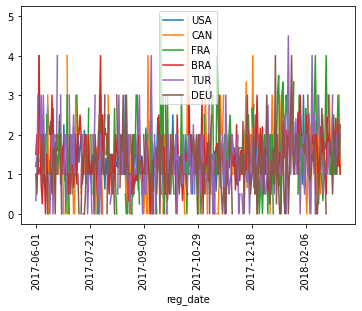

In [30]:
country_pivot = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTLCu-qp6h8-z1aUQL2r-z_nEAHjoHSDJAhs_kng19PA8ie7ECa4S8iocpJh2CuuDc_xcZ5m952LzMG/pub?gid=1551934107&single=true&output=csv')

# Plot the average first week purchases for each country by registration date
country_pivot.plot(x='reg_date', y=['USA', 'CAN', 'FRA', 'BRA', 'TUR', 'DEU'])
plt.xticks(rotation = 90)
plt.show()

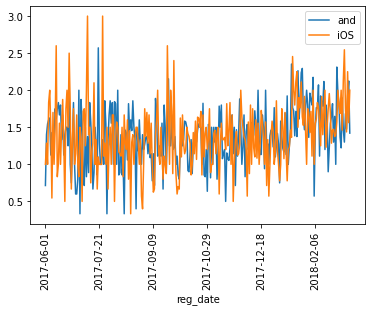

In [31]:
device_pivot = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTLCu-qp6h8-z1aUQL2r-z_nEAHjoHSDJAhs_kng19PA8ie7ECa4S8iocpJh2CuuDc_xcZ5m952LzMG/pub?gid=312092028&single=true&output=csv')

# Plot the average first week purchases for each device by registration date
device_pivot.plot(x='reg_date', y=['and', 'iOS'])
plt.xticks(rotation = 90)
plt.show()

In [32]:
daily_revenue = pd.read_csv('daily_revenue.csv')

In [33]:
# Compute 7_day_rev
daily_revenue['7_day_rev'] = daily_revenue.revenue.rolling(window=7, center=False).mean()

# Compute 28 days revenue
daily_revenue['28_day_rev'] = daily_revenue.revenue.rolling(window=28, center=False).mean()

# Compute 365 days revenue
daily_revenue['365_day_rev'] = daily_revenue.revenue.rolling(window=365, center=False).mean()

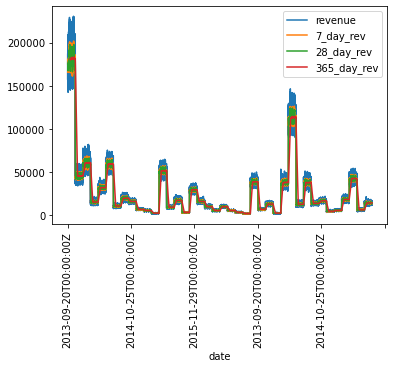

In [34]:
# Plot date, and revenue, along with the 3 rolling functions (in order)    
daily_revenue.plot(x='date', y=['revenue','7_day_rev', '28_day_rev', '365_day_rev'])
plt.xticks(rotation = 90)
plt.show()

Notice that while there is a lot of seasonality, our revenue seems to be somewhat flat over this time period.

In [35]:
# Calculate 'small_scale'
daily_revenue['small_scale'] = daily_revenue.revenue.ewm(span=10).mean()

# Median_Scale
daily_revenue['medium_scale'] = daily_revenue.revenue.ewm(span=100).mean()

# Larger_Scale
daily_revenue['large_scale'] = daily_revenue.revenue.ewm(span=500).mean()

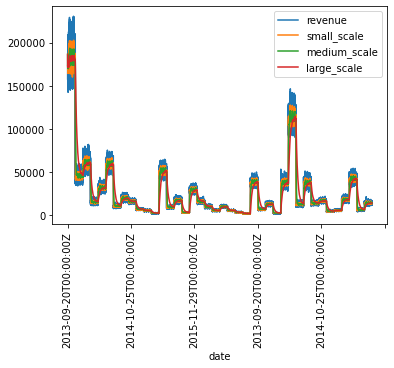

In [36]:
# Plot the scales
daily_revenue.plot(x = 'date', y =['revenue','small_scale', 'medium_scale', 'large_scale'])
plt.xticks(rotation = 90)
plt.show()

Note that the medium window strikes the right balance. Revenue seems to be growing in this product so it must not be the cause of the overall flat revenue trend!

In [37]:
user_revenue = pd.read_csv('user_revenue.csv')

# Pivot user_revenue
pivoted_data = pd.pivot_table(user_revenue, values='revenue', columns=['device', 'gender'], index='month')

In [38]:
# Remove the first and last row of the DataFrame once pivoted 
# to prevent discontinuities from distorting the result.
pivoted_data = pivoted_data[1:(len(pivoted_data) -1 )]

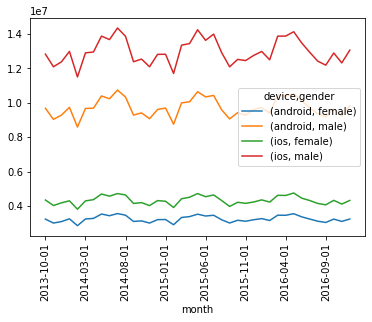

In [39]:
# plot pivoted_data
pivoted_data.plot()
plt.xticks(rotation = 90)
plt.show()

From this view, it seems like our aggregate revenue is fairly stable, so the changes are most likely not hurting revenue.

## A/B Testing

### calculate revenue per user-day, with user-day as the experimental unit.


In [40]:
# Extract the ‘day’ value from the date timestamp
purchase_data['date'] = pd.to_datetime(purchase_data['date'])

# Round our timestamp to 'day'
purchase_data.date = purchase_data.date.dt.floor('d')

In [41]:
# Replace the NaN purchase_data.price values with 0
# replace the NaN its to make calculation easier
purchase_data.price = np.where(np.isnan(purchase_data.price), 0, purchase_data.price)

In [42]:
# Agg the data 'uid' and 'date'
purchase_agg_data = purchase_data.groupby(['uid','date'], as_index=False)
revenue_user_day = purchase_agg_data.price.sum()

# Calculate average
revenue_user_day = revenue_user_day.price.mean()
revenue_user_day

407.95033407572384

### A/B test prepare

In [43]:
# Load data
data_demographic = pd.read_csv('user_demographics_paywall.csv')
paywall_views = pd.read_csv('paywall_views.csv')

In [44]:
# Merge the data using join with an 'inner', the result 
# to only include users who appear in both and will remove 
# everyone who did not view a paywall, which is what we want in this scenario.

# Merge the datasets and calculate the per day metrics 
purchase_data = data_demographic.merge(paywall_views, how='inner', on=['uid'])
purchase_data['date'] = pd.to_datetime(purchase_data['reg_date'])
purchase_data.date = purchase_data.date.dt.floor('d')

In [45]:
# Group and aggregate the data
daily_purchase_data = purchase_data.groupby(['date'], as_index=False)
daily_purchase_data = daily_purchase_data.agg({'purchase': ['sum', 'count']})

In [46]:
# Find the mean of each field
daily_purchases = daily_purchase_data.purchase['sum'].mean()
daily_paywall_views = daily_purchase_data.purchase['count'].mean()

In [47]:
# Multiple by 1000 so our result reflects the magnitude change if we had been observing the entire population.
daily_purchases = daily_purchases * 1000
daily_paywall_views = daily_paywall_views * 1000

print('\nDaily Purchases:', daily_purchases)
print('\nDaily Paywall Views:', daily_paywall_views)


Daily Purchases: 4111.11111111111

Daily Paywall Views: 111111.11111111111


## Sensitivity

In [48]:
conversion_rate = 0.03468

In [50]:
small_sensitivity = 0.1 

# Find the conversion rate when increased by the percentage of the sensitivity above
small_conv_rate = conversion_rate * (1 + small_sensitivity)

# Apply the new conversion rate to find how many more users per day that translates to
small_purchasers = daily_paywall_views * small_conv_rate

# Subtract the initial daily_purcahsers number from this new value to see the lift
purchaser_lift = small_purchasers - daily_purchases

print('\nSmall Convertion Rate:', small_conv_rate)
print('\nSmall Purchasers:', small_purchasers)
print('\nPurchaser Lift:', purchaser_lift)


Small Convertion Rate: 0.03814800000000001

Small Purchasers: 4238.666666666668

Purchaser Lift: 127.55555555555748


In [51]:
medium_sensitivity = 0.2

# Find the conversion rate lift with the sensitivity above
medium_conv_rate = conversion_rate * (1 + medium_sensitivity)

# Find how many more users per day that translates to
medium_purchasers = daily_paywall_views * medium_conv_rate

# Subtract the initial daily_purcahsers number from this new value to see the lift
purchaser_lift = medium_purchasers - daily_purchases

print('\nMedium Convertion Rate:', medium_conv_rate)
print('\nMedium Purchasers:', medium_purchasers)
print('\nPurchaser Lift:', purchaser_lift)


Medium Convertion Rate: 0.041616

Medium Purchasers: 4624.0

Purchaser Lift: 512.8888888888896


In [52]:
large_sensitivity = 0.5

# Find the conversion rate lift with the sensitivity above 
large_conv_rate = conversion_rate * (1 + large_sensitivity)

# Find how many more users per day that translates to
large_purchasers = daily_paywall_views * large_conv_rate

# Subtract the initial daily_purcahsers number from this new value to see the lift
purchaser_lift = large_purchasers - daily_purchases

print('\nLarge Convertion Rate:', large_conv_rate)
print('\nLarge Purchasers:', large_purchasers)
print('\nPurchaser Lift:', purchaser_lift)


Large Convertion Rate: 0.052020000000000004

Large Purchasers: 5780.0

Purchaser Lift: 1668.8888888888896


While it seems that a 50% increase may be too drastic and unreasonable to expect, the small and medium sensitivities both seem very reasonable.

### Standard Error

In [54]:
# Find the n & v quantities
n = purchase_data.purchase.count()

In [55]:
# Calculate the quantity "v"
v = conversion_rate * (1 - conversion_rate)

In [56]:
# Calculate the variance and standard error of the estimate
var = v / n

In [59]:
# Standard Error
se = var**0.5
se

0.00578595693036165

### Exploring the power calculation

In [62]:
def get_power(n, p1, p2, cl):
    alpha = 1 - cl
    
    qu = stats.norm.ppf(1 - alpha/2)
    
    diff = abs(p2 - p1)
    bp = (p1 + p2) / 2
    
    v1 = p1 * (1 - p1)
    v2 = p2 * (1 - p2)
    
    bv = bp * (1 - bp)
    
    power_part_one = stats.norm.cdf((n**0.5 * diff - qu * (2 * bv)**0.5)/ (v1 + v2)**0.5)
    power_part_two = 1 - stats.norm.cdf((n**0.5 * diff + qu * (2 * bv)**0.5) / (v1 + v2)**0.5)
    
    power = power_part_one + power_part_two
    return(power)

p1 = 0.1
p2 = 0.12
cl = 0.95
n1 = 1000

In [63]:
# Look at the impact of sample size increase on power
n_param_one = get_power(n=1000, p1=p1, p2=p2, cl=cl)
n_param_two = get_power(n=2000, p1=p1, p2=p2, cl=cl)

In [64]:
# Look at the impact of confidence level increase on power
alpha_param_one = get_power(n=n1, p1=p1, p2=p2, cl=0.8)
alpha_param_two = get_power(n=n1, p1=p1, p2=p2, cl=0.95)

In [69]:
print(n_param_two / n_param_one)

1.7596440001351992


In [70]:
print(alpha_param_one / alpha_param_two)

1.8857367092232278


 With these particular values, it looks like decreasing our confidence level has a slightly larger impact on the power than increasing our sample size.

### Calculating the sample size

In [71]:
def get_sample_size(power, p1, p2, cl, max_n=1000000):
    n = 1
    while n < max_n:
        tmp_power = get_power(n, p1, p2, cl)
        
        if tmp_power >= power:
            return n
        else:
            n = n + 100
    
    return 'Increase Max N value'

In [73]:
# Merge the demographics and purchase data to only include paywall views
purchase_data = data_demographic.merge(paywall_views, how='inner', on=['uid'])
  
# Find the conversion rate
conversion_rate = (sum(purchase_data.purchase) / purchase_data.purchase.count())

conversion_rate

0.037

In [74]:
# Desired Power: 0.8
# CL: 0.90
# Percent Lift: 0.1
p2 = conversion_rate * (1 + 0.1)
sample_size = get_sample_size(0.8, conversion_rate, p2, 0.90)
print(sample_size)

33801


In [75]:
# Desired Power: 0.95
# CL: 0.90
# Percent Lift: 0.1
p2 = conversion_rate * (1 + 0.1)
sample_size = get_sample_size(0.95, conversion_rate, p2, 0.90)
print(sample_size)

59101


## Analyzing the A/B test results

In [77]:
# Load data
ab_test_results = pd.read_csv('AB_testing_file.csv')

In [78]:
results = ab_test_results.groupby('group').agg({'uid': pd.Series.nunique})
results

,uid
group,
GRP A,23009
GRP B,22874


In [79]:
# Find the overall number of unique users using "len" and "unique"
unique_users = len(ab_test_results.uid.unique())

# Find the percentage in each group
results = results / unique_users * 100
print(results)

             uid
group           
GRP A  50.147113
GRP B  49.852887


In [80]:
# Find the unique users in each group 
results = ab_test_results.groupby(by=['group', 'device', 'gender']).agg({'uid': pd.Series.nunique}) 

# Find the overall number of unique users using "len" and "unique"
unique_users = len(ab_test_results.uid.unique())

# Find the percentage in each group
results = results / unique_users * 100
print(results)

                           uid
group device gender           
GRP A A      F       12.239827
             M       12.795589
      I      F       12.542772
             M       12.568925
GRP B A      F       12.553669
             M       12.499183
      I      F       12.283417
             M       12.516618


### Statistical Significance

In [81]:
def get_pvalue(con_conv, test_conv, con_size, test_size):  
    lift =  - abs(test_conv - con_conv)

    scale_one = con_conv * (1 - con_conv) * (1 / con_size)
    scale_two = test_conv * (1 - test_conv) * (1 / test_size)
    scale_val = (scale_one + scale_two)**0.5

    p_value = 2 * stats.norm.cdf(lift, loc = 0, scale = scale_val )

    return p_value

In [82]:
# Get the p-value
p_value = get_pvalue(con_conv=0.1, test_conv=0.17, con_size=1000, test_size=1000)
p_value

4.131297741047306e-06

In [84]:
# Find the p-value with control conversion of 0.1, test conversion of 0.15, and 100 observations in each group.
# Get the p-value
p_value = get_pvalue(con_conv=0.1, test_conv=0.15, con_size=100, test_size=100)
p_value

0.28366948940702086

In [85]:
# find the p-value with control conversion of 0.48, test conversion of 0.50, and 1000 observations in each group.
p_value = get_pvalue(con_conv=0.48, test_conv=0.50, con_size=1000, test_size=1000)
p_value

0.370901935824383

To recap, we observed that a large lift makes us confident in our observed result, while a small sample size makes us less so, and ultimately high variance can lead to a high p-value!

In [86]:
cont_conv, test_conv, cont_size, test_size = (0.09096495570387314, 0.1020053238686779, 5329, 5748)

In [87]:
# Compute the p-value
p_value = get_pvalue(cont_conv, test_conv, cont_size, test_size)
p_value

0.04900185792087508

In [88]:
if p_value >= 0.05:
    print('Not Significant')
else:
    print('Significant Resulst')

Significant Resulst


because our result is significant, we can continue to provide confidence intervals

### Confidence Interval

In [90]:
# Find the confidence interval with a value of 1, a confidence level of 0.975 and a standard deviation of 0.5.
def get_ci(value, cl, sd):
    loc = sci.norm.ppf(1 - cl / 2)
    rng_val = sci.norm.cdf(loc - value/sd)
    lwr_bnd = value - rng_val
    upr_bnd = value + rng_val
    return_val = (lwr_bnd, upr_bnd)
    return(return_val)

# Compute and print the confidence interval
confidence_interval = get_ci(1, 0.975, 0.5)
confidence_interval

(0.9755040421682947, 1.0244959578317054)

In [91]:
# updating the confidence level to 0.95 and the standard deviation to 2. Leave the value as 1
# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.95, 2)
confidence_interval

(0.6690506448818785, 1.3309493551181215)

In [92]:
# Change Standard Deviation with 0.001
confidence_interval  = get_ci(1, 0.95, 0.001)
confidence_interval

(1.0, 1.0)

As our standard deviation decreases so too do the width of our confidence interval.

In [93]:
# Calculate the mean of our lift distribution 
lift_mean = test_conv - cont_conv

In [97]:
# Calculate variance and standard deviation 
lift_variance = (1 - test_conv) * test_conv / test_size + (1 - cont_conv) * cont_conv / cont_size

lift_sd = lift_variance**0.5

# Find the confidence intervals with cl = 0.95
confidence_interval = get_ci(lift_mean, 0.95, lift_sd)
confidence_interval

(-0.01729325163576479, 0.039373987965374314)

Notice that our interval is very narrow thanks to our substantial lift and large sample size.

### Interpreting the result

In [98]:
cont_var = 1.411507925080655e-06
test_var = 1.6255542142857143e-06
test_conv = 0.102005
cont_conv = 0.090965

In [99]:
# Compute the standard deviations
control_sd = cont_var**0.5
test_sd = test_var**0.5

# Create range of x values
control_line = np.linspace(cont_conv - 3 * control_sd, cont_conv + 3 * control_sd, 100)
test_line = np.linspace(test_conv - 3 * test_sd ,test_conv +  3 * test_sd, 100)

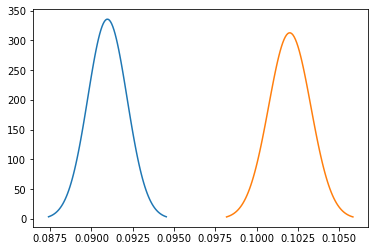

In [101]:
# Plot the distribution     
plt.plot(control_line, scipy.stats.norm.pdf(control_line, cont_conv, control_sd))
plt.plot(test_line, scipy.stats.norm.pdf(test_line, test_conv, test_sd))
plt.show()

We see no overlap, which intuitively implies that our test and control conversion rates are significantly distinct.

In [102]:
# plot the difference distribution of our results that is, the distribution of our lift.
lwr_ci = 0.01103999822042502
upr_ci = 0.011040000177957487

In [103]:
# Find the lift statistics
lift_mean = test_conv - cont_conv
lift_sd = (test_var + cont_var) ** 0.5

In [104]:
# Generate the range of x-values
lift_line = np.linspace(lift_mean - 3 * lift_sd, lift_mean + 3 * lift_sd, 100)

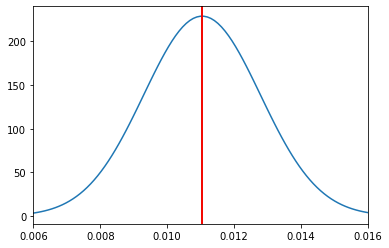

In [107]:
# Plot the distribution 
plt.plot(lift_line, scipy.stats.norm.pdf(lift_line, lift_mean, lift_sd))
# Add the annotation lines
plt.axvline(x = lift_mean, color = 'green')
plt.axvline(x = lwr_ci, color = 'red')
plt.axvline(x = upr_ci, color = 'red')
plt.xlim([0.006, 0.016])
plt.show()

 This really contextualizes the lift we observed and provides more information than reporting the numerical point estimate alone would.